# Анализ метрик моделей на датасете movielens

## 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

with open('/content/movielens_metrics.txt', 'r') as f:
    all_lines = f.readlines()

all_lines[:5]


['BERT4Rec\n',
 '\n',
 'precision@1 : 0.017650773602778655\n',
 'precision@2 : 0.013782759709504263\n',
 'precision@3 : 0.011746131986106682\n']

In [2]:
metrics_dict_1 = {}
last_method_name = ''
for i in range(len(all_lines)):
    cur_line = all_lines[i].replace('\n', '')
    if len(cur_line) == 0 or '=' in cur_line:
        continue
    if ':' not in cur_line:
        last_method_name = cur_line
        continue
    name_metric, value_metric = cur_line.split(':')
    value_metric = float(value_metric)
    if metrics_dict_1.get(last_method_name, None) is None:
        metrics_dict_1[last_method_name] = {}
    metrics_dict_1[last_method_name][name_metric] = value_metric
    

In [3]:
metrics_dict_1.keys()

dict_keys(['BERT4Rec', 'DSSM', 'GRU4Rec', 'SLIM', 'ALS', 'Implicit ALS', 'SVD++', 'NGCF', 'RecVAE', 'SHAN', 'SRGNN', 'SRGNN Pretrained SHAN', 'NGCF Pretrained SHAN'])

In [4]:
metrics_dict_1['Implicit ALS'].keys()

dict_keys(['precision@1 ', 'precision@2 ', 'precision@3 ', 'precision@4 ', 'precision@5 ', 'precision@6 ', 'precision@7 ', 'precision@8 ', 'precision@9 ', 'precision@10 ', 'precision@11 ', 'precision@12 ', 'precision@13 ', 'precision@14 ', 'precision@15 ', 'precision@16 ', 'precision@17 ', 'precision@18 ', 'precision@19 ', 'ndcg', 'mrr', 'mapk@1 ', 'mapk@2 ', 'mapk@3 ', 'mapk@4 ', 'mapk@5 ', 'mapk@6 ', 'mapk@7 ', 'mapk@8 ', 'mapk@9 ', 'mapk@10 ', 'mapk@11 ', 'mapk@12 ', 'mapk@13 ', 'mapk@14 ', 'mapk@15 ', 'mapk@16 ', 'mapk@17 ', 'mapk@18 ', 'mapk@19 '])

In [5]:
df = pd.DataFrame(metrics_dict_1)
df

,BERT4Rec,DSSM,GRU4Rec,SLIM,ALS,Implicit ALS,SVD++,NGCF,RecVAE,SHAN,SRGNN,SRGNN Pretrained SHAN,NGCF Pretrained SHAN
precision@1,0.017651,0.000000,0.002684,0.005139,0.004076,0.003013,0.006380,0.001063,0.000000,0.233502,0.044125,0.010810,0.010455
precision@2,0.013783,0.052454,0.011320,0.006291,0.003544,0.003456,0.005937,0.000709,0.000299,0.158668,0.033581,0.009126,0.012316
precision@3,0.011746,0.034970,0.007841,0.005907,0.004548,0.003249,0.005789,0.000945,0.000384,0.110620,0.024987,0.010751,0.013173
precision@4,0.010254,0.026227,0.007539,0.005626,0.005272,0.003323,0.006645,0.000842,0.000397,0.083320,0.019626,0.009879,0.013247
precision@5,0.009062,0.020982,0.006138,0.005813,0.005245,0.003438,0.006592,0.000921,0.000397,0.072075,0.016055,0.008931,0.012617
precision@6,0.008262,0.017485,0.005136,0.005759,0.005641,0.003426,0.007472,0.001211,0.000405,0.071461,0.013734,0.007620,0.012848
precision@7,0.007560,0.014987,0.004425,0.005342,0.005468,0.003645,0.007392,0.001165,0.000497,0.062908,0.011924,0.006607,0.013164
precision@8,0.006891,0.013136,0.003892,0.005272,0.005427,0.003633,0.007066,0.001130,0.000507,0.055182,0.010500,0.005870,0.012781
precision@9,0.006438,0.011679,0.003466,0.005080,0.005277,0.003564,0.007147,0.001201,0.000507,0.049272,0.009451,0.005297,0.012764
precision@10,0.006031,0.010513,0.003135,0.005387,0.005192,0.003580,0.007159,0.001152,0.000507,0.050821,0.008559,0.004767,0.012750


## 2. Сравнение графовых сетей с предобученными и непредобученными эмбеддингами

In [8]:
methods = ['NGCF', 'SRGNN']

method2ngcf_method = {
    'NGCF' : 'NGCF Pretrained SHAN',
    'SRGNN' : 'SRGNN Pretrained SHAN', 
}


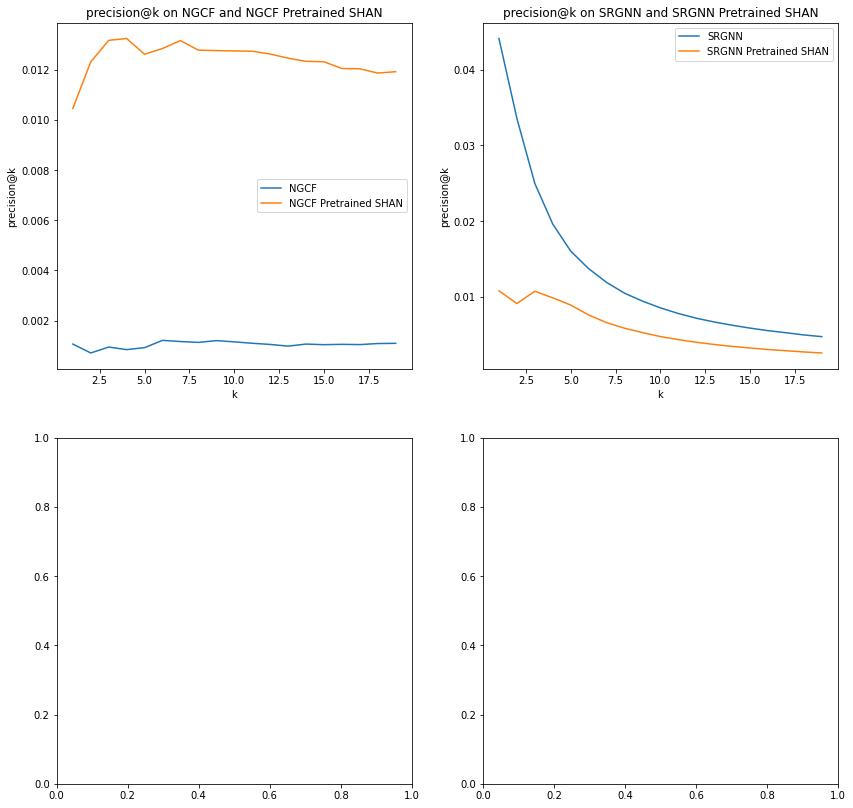

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for ind_method, method in enumerate(methods):
    ngcf_method = method2ngcf_method[method]
    
    precision_method = [0 for _ in range(19)]
    precision_ngcf_method = [0 for _ in range(19)]
    for metric_name in df.index: 
        if 'precision' in metric_name:
            k_metric = int(metric_name.split('@')[1])
            precision_method[k_metric - 1] = df.loc[metric_name][method]
            precision_ngcf_method[k_metric - 1] = df.loc[metric_name][ngcf_method]
    x = np.arange(len(precision_method)) + 1
    axs[ind_method // 2, ind_method % 2].set_title(f"precision@k on {method} and {ngcf_method}")
    axs[ind_method // 2, ind_method % 2].set_xlabel("k")
    axs[ind_method // 2, ind_method % 2].set_ylabel("precision@k")
    axs[ind_method // 2, ind_method % 2].plot(x, precision_method, label=method)
    axs[ind_method // 2, ind_method % 2].plot(x, precision_ngcf_method, label=ngcf_method)
    axs[ind_method // 2, ind_method % 2].legend()


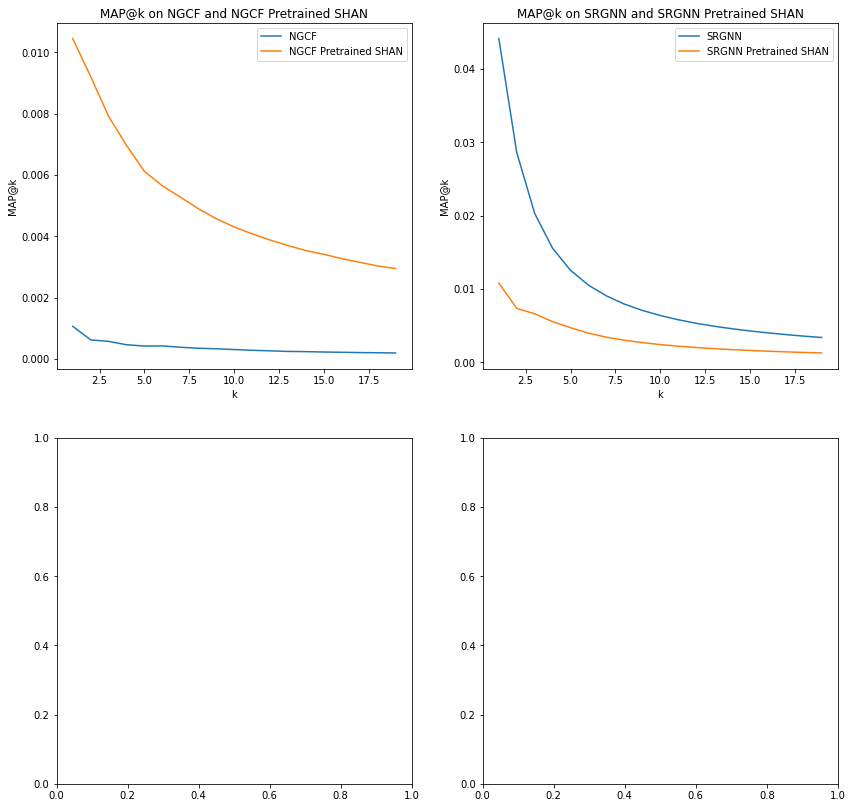

In [18]:

fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for ind_method, method in enumerate(methods):
    ngcf_method = method2ngcf_method[method]
    
    precision_method = [0 for _ in range(19)]
    precision_ngcf_method = [0 for _ in range(19)]
    for metric_name in df.index: 
        if 'mapk' in metric_name:
            k_metric = int(metric_name.split('@')[1])
            precision_method[k_metric - 1] = df.loc[metric_name][method]
            precision_ngcf_method[k_metric - 1] = df.loc[metric_name][ngcf_method]
    x = np.arange(len(precision_method)) + 1
    axs[ind_method // 2, ind_method % 2].set_title(f"MAP@k on {method} and {ngcf_method}")
    axs[ind_method // 2, ind_method % 2].set_xlabel("k")
    axs[ind_method // 2, ind_method % 2].set_ylabel("MAP@k")
    axs[ind_method // 2, ind_method % 2].plot(x, precision_method, label=method)
    axs[ind_method // 2, ind_method % 2].plot(x, precision_ngcf_method, label=ngcf_method)
    axs[ind_method // 2, ind_method % 2].legend()


## 3. Сравнение всех подходов

In [20]:
df.index

Index(['precision@1 ', 'precision@2 ', 'precision@3 ', 'precision@4 ',
       'precision@5 ', 'precision@6 ', 'precision@7 ', 'precision@8 ',
       'precision@9 ', 'precision@10 ', 'precision@11 ', 'precision@12 ',
       'precision@13 ', 'precision@14 ', 'precision@15 ', 'precision@16 ',
       'precision@17 ', 'precision@18 ', 'precision@19 ', 'ndcg', 'mrr',
       'mapk@1 ', 'mapk@2 ', 'mapk@3 ', 'mapk@4 ', 'mapk@5 ', 'mapk@6 ',
       'mapk@7 ', 'mapk@8 ', 'mapk@9 ', 'mapk@10 ', 'mapk@11 ', 'mapk@12 ',
       'mapk@13 ', 'mapk@14 ', 'mapk@15 ', 'mapk@16 ', 'mapk@17 ', 'mapk@18 ',
       'mapk@19 '],
      dtype='object')

In [24]:
metrics = ['mapk@1 ', 'mapk@10 ', 'mapk@19 ', 'mrr', 'ndcg', 'precision@1 ', 'precision@10 ', 'precision@19 ']


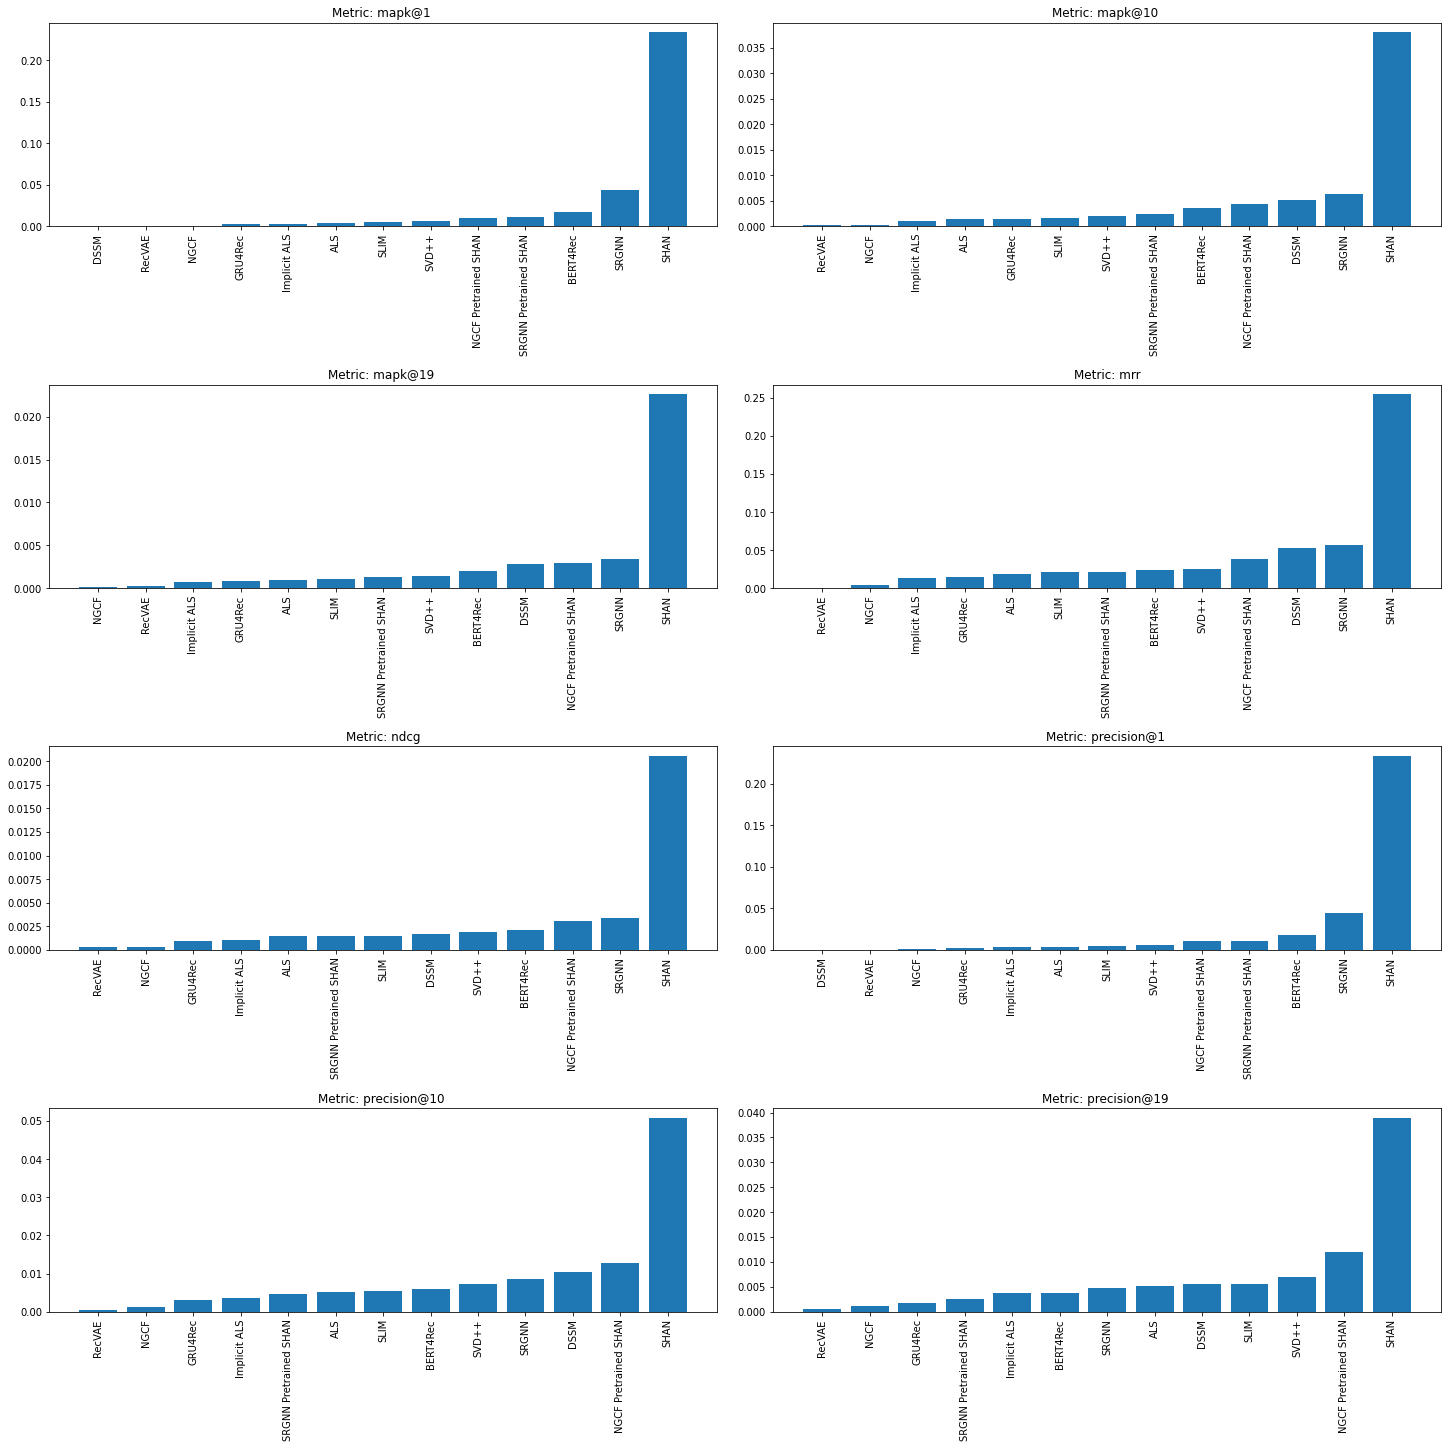

In [26]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20), constrained_layout = True)

for i, metric in enumerate(metrics):
    df_max = df.sort_values(by=metric, axis=1)
    x = df_max.loc[metric].index
    y = df_max.loc[metric].values
    axs[i // 2, i % 2].set_title(f"Metric: {metric}")
    axs[i // 2, i % 2].bar(x, y)
    for tick in axs[i // 2, i % 2].get_xticklabels():
        tick.set_rotation(90)

    axs[i // 2, i % 2].plot()
   
